# Case Study - What do e-commerce / marketing companies gain by acquiring ex-perimentation & measurement capabilities?

This notebook contain the code used to generate results described in Section 6 of the paper.

In [1]:
from normal_normal_model import E_V, get_prioritisation_value_samples
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def get_improvement_against_M(N, mu_X, sigma_X, mu_epsilon, 
                              sigma_1, sigma_2, M_list, verbose=False):
    
    sigma_sq_1 = sigma_1 ** 2
    sigma_sq_2 = sigma_2 ** 2
    sigma_sq_X = sigma_X ** 2
    NUM_SAMPLES = 2000
    
    E_Ds = []
    CI_lows = []
    CI_highs = []
    
    print("Parameters: N = {}, mu_X = {}, sigma_X = {}, "
      "mu_epsilon = {}, sigma_1 = {}, sigma_2 = {}"
      .format(N, mu_X, sigma_X, mu_epsilon, sigma_1, sigma_2))

    for M in M_list:
        _, _, improvement = (
            get_prioritisation_value_samples(
                NUM_SAMPLES, N, M, mu_X, mu_epsilon, 
                sigma_sq_X, sigma_sq_1, sigma_sq_2, verbose=False)
        )

        E_D = np.mean(improvement)
        CI_low = np.percentile(improvement, 5)
        CI_high = np.percentile(improvement, 95)

        E_Ds.append(E_D)
        CI_lows.append(CI_low)
        CI_highs.append(CI_high)
        
        if verbose:
            print("M = {}, Improvement = {}, CI = [{}, {}]"
                  .format(M, np.round(E_D, 4),
                          np.round(CI_low, 4), np.round(CI_high, 4)))
            
    return E_Ds, CI_lows, CI_highs

def generate_improvement_against_M_plot(M_list, exp_improvements, CI_lows, CI_highs):
    fig, ax = plt.subplots()
    
    ax.errorbar(exp_improvements, M_list, 
                xerr=[np.array(exp_improvements) - np.array(CI_lows), 
                      np.array(CI_highs) - np.array(exp_improvements)],
                fmt='o', capsize=3)
    
    ax.axvline(0, c='black')
    
    # The zero line has to be visible
    ax.set_xlim(min(min(CI_lows)-0.01, -0.01) * 1.05, 
                max(max(CI_highs), 0.01) * 1.05)
    
#     ax.set_xlabel('Value gained')
#     ax.set_ylabel('M')
    
    return fig, ax

# One Figure

Here we consider the case of generating a single figure (i.e. a $\sigma^2_1, \sigma^2_2$ pair). This is to ensure we can generate multiple figures in the experiments described in Section 6 of the paper.

In [3]:
N = 6700
sigma_X = 0.75
mu_X = 0
mu_epsilon = 0

M_list = [10, 20, 50, 100, 200, 500, 1000, 1500, 2000]
sigma_1 = 1.5
sigma_2 = 1

E_Ds, CI_lows, CI_highs = (
    get_improvement_against_M(N, mu_X, sigma_X, mu_epsilon, 
                              sigma_1, sigma_2, M_list, verbose=True)
)


Parameters: N = 6700, mu_X = 0, sigma_X = 0.75, mu_epsilon = 0, sigma_1 = 1.5, sigma_2 = 1
M = 10, Improvement = 0.383, CI = [-0.0897, 0.8762]
M = 20, Improvement = 0.3492, CI = [-0.0063, 0.686]
M = 50, Improvement = 0.3112, CI = [0.1109, 0.5231]
M = 100, Improvement = 0.289, CI = [0.1457, 0.4263]
M = 200, Improvement = 0.2588, CI = [0.1608, 0.3617]
M = 500, Improvement = 0.2162, CI = [0.1532, 0.2747]
M = 1000, Improvement = 0.179, CI = [0.14, 0.2186]
M = 1500, Improvement = 0.1535, CI = [0.1241, 0.1845]
M = 2000, Improvement = 0.1336, CI = [0.1093, 0.1581]


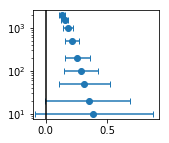

In [4]:
fig, ax = generate_improvement_against_M_plot(
    M_list, E_Ds, CI_lows, CI_highs)

ax.set_yscale('log')
fig.set_size_inches(2.25, 2)

fig

# Potential value gained for e-commerce companies

Here we treat the 6700 e-commerce experiments reported by Browne and Johnson as if that they are run by the same organisation, how much value would such organisation gain if the measurement/estimation noise is reduced from $\sigma^2_1$ to $\sigma^2_2$?

In [5]:
M_list = [10, 20, 50, 100, 200, 500, 1000, 2000]
N = 6700
sigma_X = 0.6
mu_X = 0
mu_epsilon = 0

for sigma_1 in [1, 0.8, 0.6]:
    for sigma_2 in [0.8, 0.6, 0.4]:
        if sigma_1 > sigma_2:
            E_Ds, CI_lows, CI_highs = (
                get_improvement_against_M(N, mu_X, sigma_X, mu_epsilon, 
                                          sigma_1, sigma_2, M_list, verbose=True)
            )
            
            fig, ax = generate_improvement_against_M_plot(
                M_list, E_Ds, CI_lows, CI_highs)

            ax.set_yscale('log')
            fig.set_size_inches(2.5, 2)
            fig.savefig("../output/value_gained_browne_johnson_{}_{}.pdf"
                        .format(str(sigma_1).replace('.', '-'),
                                str(sigma_2).replace('.', '-')),
                        transparent=True, bbox_inches='tight')

Parameters: N = 6700, mu_X = 0, sigma_X = 0.6, mu_epsilon = 0, sigma_1 = 1, sigma_2 = 0.8
M = 10, Improvement = 0.1605, CI = [-0.2239, 0.544]
M = 20, Improvement = 0.1541, CI = [-0.1076, 0.4103]
M = 50, Improvement = 0.1452, CI = [-0.0197, 0.3103]
M = 100, Improvement = 0.1285, CI = [0.0191, 0.246]
M = 200, Improvement = 0.1169, CI = [0.0408, 0.1962]
M = 500, Improvement = 0.0964, CI = [0.0481, 0.1425]
M = 1000, Improvement = 0.0795, CI = [0.0491, 0.1097]
M = 2000, Improvement = 0.0593, CI = [0.0401, 0.0784]
Parameters: N = 6700, mu_X = 0, sigma_X = 0.6, mu_epsilon = 0, sigma_1 = 1, sigma_2 = 0.6
M = 10, Improvement = 0.3716, CI = [0.0355, 0.7207]
M = 20, Improvement = 0.3511, CI = [0.1086, 0.6028]
M = 50, Improvement = 0.3199, CI = [0.1718, 0.4676]
M = 100, Improvement = 0.2907, CI = [0.1864, 0.3956]
M = 200, Improvement = 0.2619, CI = [0.1867, 0.3371]
M = 500, Improvement = 0.2181, CI = [0.1764, 0.2624]
M = 1000, Improvement = 0.1803, CI = [0.1519, 0.2084]
M = 2000, Improvement = 0.1

# Potential value gained for marketing companies

Here we treat the 184 e-commerce experiments reported by Johnson et al. as if that they are run by the same organisation, how much value would such organisation gain if the measurement/estimation noise is reduced from $\sigma^2_1$ to $\sigma^2_2$?

In [6]:
M_list = [10, 20, 30, 40, 50, 60, 80, 100]
N = 184
sigma_X = 10
mu_X = 19.9
mu_epsilon = 0

for sigma_1 in [5, 2, 1, 0.8, 0.6]:
    for sigma_2 in [0.8, 0.6, 0.4]:
        if sigma_1 > sigma_2:
            E_Ds, CI_lows, CI_highs = (
                get_improvement_against_M(N, mu_X, sigma_X, mu_epsilon, 
                                          sigma_1, sigma_2, M_list, verbose=True)
            )
            
            fig, ax = generate_improvement_against_M_plot(
                M_list, E_Ds, CI_lows, CI_highs)
            
            ax.set_yscale('linear')
            fig.set_size_inches(2.5, 2)
            fig.savefig("../output/value_gained_johnson_etal_{}_{}.pdf"
                        .format(str(sigma_1).replace('.', '-'),
                                str(sigma_2).replace('.', '-')),
                        transparent=True, bbox_inches='tight')

Parameters: N = 184, mu_X = 19.9, sigma_X = 10, mu_epsilon = 0, sigma_1 = 5, sigma_2 = 0.8
M = 10, Improvement = 2.061, CI = [0.6382, 3.8492]
M = 20, Improvement = 1.7523, CI = [0.8107, 2.8675]
M = 30, Improvement = 1.5311, CI = [0.7882, 2.3641]
M = 40, Improvement = 1.3805, CI = [0.7611, 2.0723]
M = 50, Improvement = 1.2489, CI = [0.7345, 1.8358]
M = 60, Improvement = 1.1346, CI = [0.6717, 1.6448]
M = 80, Improvement = 0.9331, CI = [0.5893, 1.3363]
M = 100, Improvement = 0.7496, CI = [0.4524, 1.0667]
Parameters: N = 184, mu_X = 19.9, sigma_X = 10, mu_epsilon = 0, sigma_1 = 5, sigma_2 = 0.6
M = 10, Improvement = 2.0941, CI = [0.6314, 3.7755]
M = 20, Improvement = 1.7345, CI = [0.743, 2.8436]
M = 30, Improvement = 1.5778, CI = [0.8337, 2.4012]
M = 40, Improvement = 1.409, CI = [0.7797, 2.0984]
M = 50, Improvement = 1.2532, CI = [0.7364, 1.8318]
M = 60, Improvement = 1.1451, CI = [0.6992, 1.6453]
M = 80, Improvement = 0.9437, CI = [0.5902, 1.3414]
M = 100, Improvement = 0.7562, CI = [0.4